In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GPUCBAgentContinuous import GPUCBAgentContinuous as UCBC

# Parameters

In [2]:
n = 252
p = 3

np.random.seed(0)

mu = np.random.uniform(-0.1, 0.1, p)
sigma = 0.5

# Synthetic Data

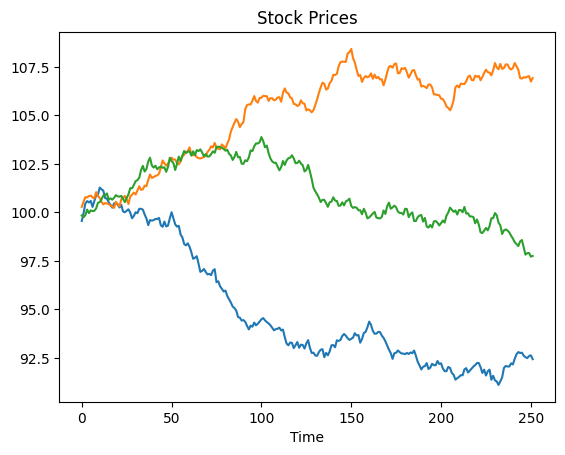

In [3]:
dt = 1/252
increments = np.random.normal(0, 1, (n, p)) * dt * sigma + np.tile(mu * dt, (n ,1))
stock_prices = 100*np.exp(np.cumsum(increments, axis = 0))

plt.plot(stock_prices)
plt.title('Stock Prices')
plt.xlabel('Time')
plt.show()

# Portfolio Class

Note that (as in reality!) we only observe the current price!

In [4]:
class portfolio:
  def __init__(self, initial_portfolio, stocks_data, ir = 0.03, cost_per_transaction = 0.01):

    self.current = initial_portfolio
    self.t = 0

    self.profit = 0

    self.data = stocks_data
    self.ir = ir
    self.cost = cost_per_transaction

  def update(self, arms):
    self.current = self.current + arms

    new = self.current*(self.data[self.t]-self.data[self.t-1])
    if arms<0:
        new -= arms*(self.ir)*self.data[self.t-1]
    new -= self.cost*arms*self.data[self.t-1]

    self.profit += new

    self.t += 1
    return new

def rescale(x, a=-1, b=1):
  return x*(b-a) + a

# Run it!

In [5]:
ptfs = []
for i in range(p):
  ptfs.append(portfolio(1, stock_prices[:,i]))

agent = [UCBC(n)]*p
strategy = np.zeros((n,p))

for t in range(n-1):
  for stock in range(p):
    ptf = ptfs[stock]
    strategy[t+1, stock] = rescale(agent[stock].pull_arm())
    r = ptf.update(strategy[t,stock])
    agent[stock].update(r)

## Comparison with Buy and Hold Strategy

In [6]:
initial = np.dot(np.ones(p), stock_prices[0,:]) # common
final = np.dot(np.ones(p), stock_prices[-1,:])

dynamic = np.zeros(p)
for stock in range(p):
  ptf = ptfs[i]
  dynamic[stock] = ptf.profit

In [7]:
(final-initial)/initial, sum(dynamic)/initial

(-0.008591355094719644, 8.904375314212261)